### <span style='color:#4B0082'> ▎ Image Binarization
 
Image binarization is a technique used in image processing to convert a grayscale image into a binary image. In a binary image, each pixel is represented by one of two possible values, typically 0 (black) or 1 (white). This simplification helps in reducing the amount of data to process and enhances the contrast between different objects in the image.
 
### <span style='color:#4B0082'> ▎ Applications of Image Binarization
 
<span style='color:#553edf'> **1. Document Image Processing:**</span> Binarization is widely used in Optical Character Recognition (OCR) systems to separate text from the background, making it easier to recognize characters.
 
  
<span style='color:#553edf'> **2. Medical Imaging:**</span> In medical imaging, binarization can help isolate structures like tumors or organs from the background in X-rays or MRIs.
 
<span style='color:#553edf'> **3. Object Detection:**</span> Binarization is used in robotics and computer vision for detecting and identifying objects in images, particularly when the objects are distinguishable from the background.
 
<span style='color:#553edf'> **4. Image Segmentation:**</span> It aids in segmenting different regions of an image for further analysis or processing.
 
<span style='color:#553edf'> **5. Quality Control:**</span> In manufacturing, binarization can be used to inspect products by detecting defects against a uniform background.
 
<span style='color:#553edf'> **6. Face Detection:**</span> Binarization can enhance features relevant for face detection algorithms.
 
### <span style='color:#4B0082'> ▎ Methods of Image Binarization in OpenCV
 
OpenCV provides several methods for binarization, each suited for different scenarios. some common methods are **global thresholding**, **Otsu's thersholdind** and **adaptive thresholding**.


### <span style='color:#553edf'> **1. Global Thresholding:**</span>
 
   • Function: cv2.threshold()
 
   • Description: A single threshold value is chosen, and all pixel values above this threshold are set to 255 (white), while those below are set to 0 (black).
 
   • **Use Case: Best for images with uniform lighting conditions.**
 
   • Example:
          _, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
<br/> 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

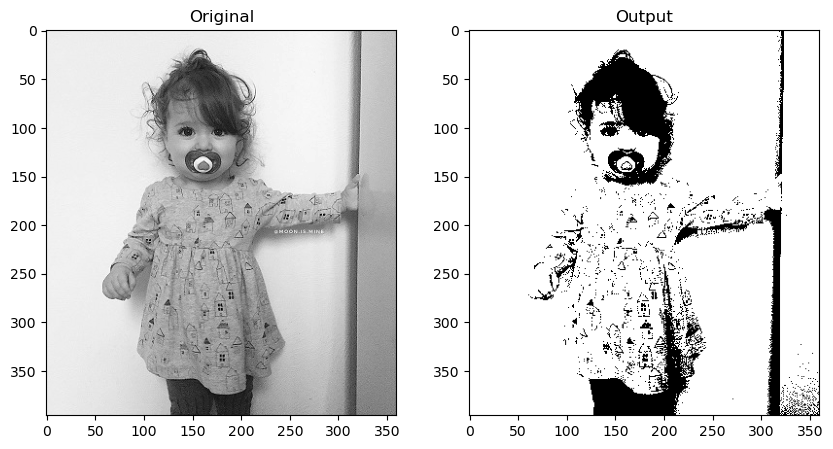

In [3]:
# Load our image as greyscale 
image = cv2.imread('images/Lusin.jpg', 0)

new_image = np.copy(image)
new_image[new_image <  127] = 0
new_image[new_image >= 127] = 255

plt.figure(figsize=[10,5])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(new_image, cmap='gray');plt.title("Output");

### <span style='color:#553edf'> 2. Otsu's Thresholding:</span>

• Function: cv2.threshold()

• Description: Automatically calculates an optimal threshold value using Otsu's method, which minimizes intra-class variance.

#### • Use Case: Useful when the histogram of the image has a bimodal distribution.

• Example: _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

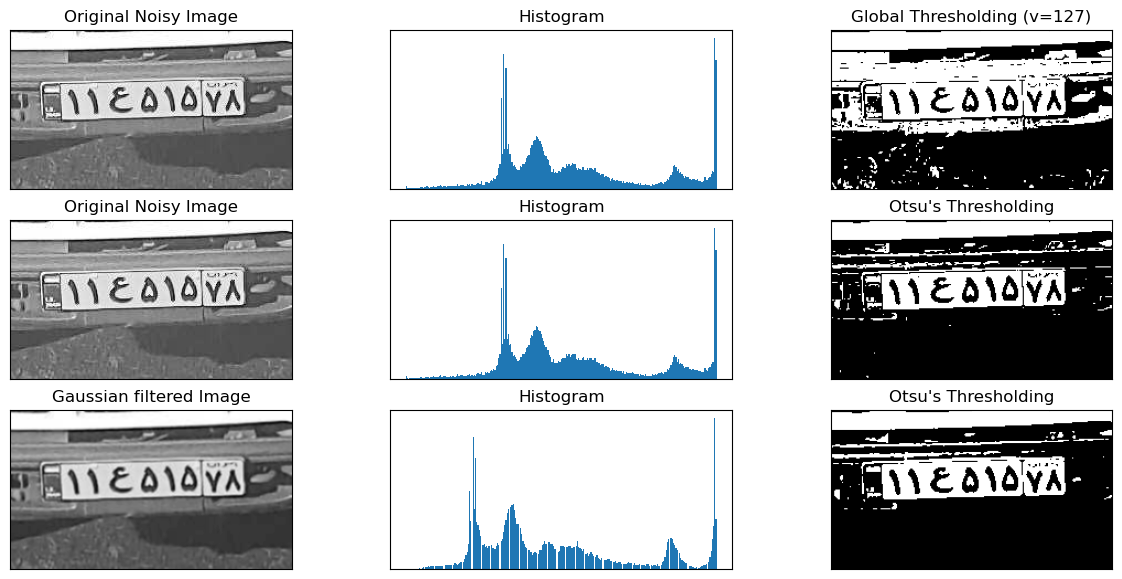

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('images/plate2.jpg',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(3,3),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=[15,7])
for i in range(3):
    #first column
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray'),
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    #second column
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    #third column
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### <span style='color:#553edf'> **3. Adaptive Theresholding:**</span>
 
   • Function: cv2.adaptiveThreshold()
 
   • Description: The threshold value is computed for smaller regions of the image, allowing for varying lighting conditions.
 
   • **Use Case: Effective for images with varying illumination, such as scanned documents.**
 
   • Example:
          binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C)

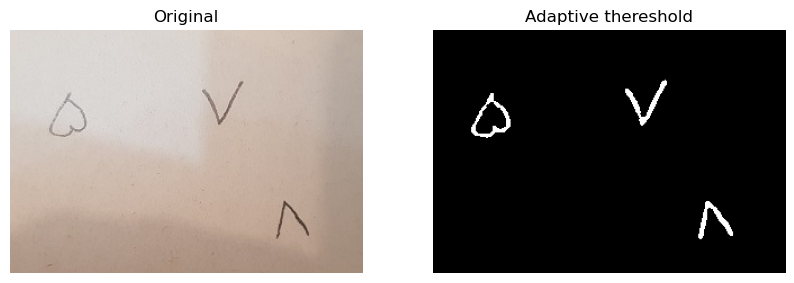

In [3]:
# Load the image
image_path = 'images/number threshold.jpg' 
img = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a large Gaussian blur to reduce noise
kernel_size = (13, 13) 
blurred = cv2.GaussianBlur(gray, kernel_size, 0)

# Use adaptive thresholding to create a binary image
binary = cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 9, 2)

# Show the results
#cv2.imshow('Original Image', img)
#cv2.imshow('Grayscale Image', gray)
#cv2.imshow('Blurred Image', blurred)
#cv2.imshow('Binary Image', binary)

# Wait for a key press and close all windows
#cv2.waitKey(0)
#cv2.destroyAllWindows()

cv2.imwrite('binary image.jpg', binary)


plt.figure(figsize=[10,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original"); plt.axis('off');
plt.subplot(122);plt.imshow(binary,cmap='gray');plt.title("Adaptive thereshold"); plt.axis('off');

### Check the effect of kernel size, block size and  additive costant on adaptive threshold using trackbar

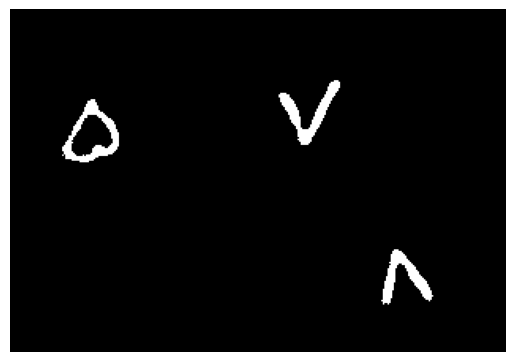

In [4]:
image_path = 'number threshold.jpg'  
img = cv2.imread(image_path)
title_window = 'Binary image'

# Slider maximum values
F_size_max = 11
Block_size_max = 11
Additive_constant_max = 5

# Default values
F_size, Block_size, Additive_constant = 3, 3, 0

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def on_trackbar_F_size(val):
    global F_size
    F_size = 2 * val + 1  # Ensure it's odd

def on_trackbar_Block_size(val):
    global Block_size
    Block_size = 2 * val + 1  # Ensure it's odd

def on_trackbar_Additive_constant(val):
    global Additive_constant
    Additive_constant = val *0.5

# Create trackbars
cv2.namedWindow(title_window)
cv2.createTrackbar('kernel_size', title_window, 1, F_size_max, on_trackbar_F_size)
cv2.createTrackbar('Block_size', title_window, 0, Block_size_max, on_trackbar_Block_size)
cv2.createTrackbar('Additive_constant', title_window, 0, Additive_constant_max, on_trackbar_Additive_constant)

while True:
    # Apply a large Gaussian blur to reduce noise
    kernel_size = (F_size, F_size) 
    blurred = cv2.GaussianBlur(gray, kernel_size, 0)

    # Use adaptive thresholding to create a binary image
    binary = cv2.adaptiveThreshold(blurred, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV,
                                   Block_size,
                                   Additive_constant)

    # Show the binary image
    cv2.imshow(title_window, binary)

    if cv2.waitKey(1) & 0xFF == 27:  # Escape key to exit
        break

cv2.destroyAllWindows()

# Show the final image using matplotlib
plt.imshow(binary, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()
